# 📓 Linear Regression from Scratch

### 🎯 Objective
- Implement a linear regression model using gradient descent. 
- Derive the gradient updates, write a scikit-learn-like class, and evaluate using synthetic data.
- Compare the result of the same with library code output
- Use R2-Score and Mean Absolute Percentage error as Performance metric on test data

## 📊 Generate Synthetic Data

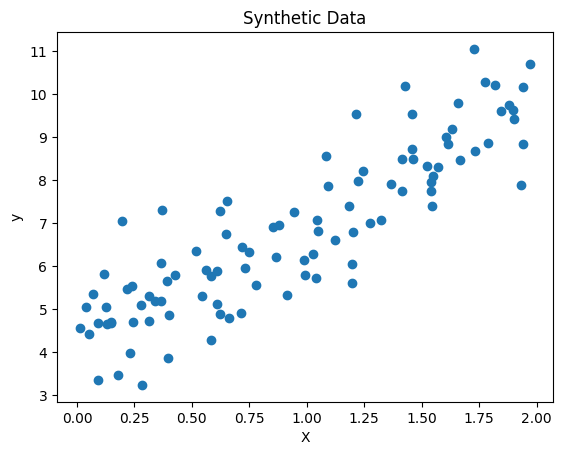

In [96]:

import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data")
plt.show()


## Do Train-Test Split (75%-25%)

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

## Do the Linear Regression with Scikit-Learn Library

In [98]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

mod=LinearRegression()

mod.fit(X_train,y_train)
y_pred=mod.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score
a=mean_absolute_percentage_error(y_test,y_pred)
a
b=r2_score(y_pred,y_test)
print(f"MSE-->{a},R2-score-->{b}")

MSE-->0.11510854759055766,R2-score-->0.6962191028271908


## Do Ridge and Lasso Regression and Compare the evaluation metrics in a table

In [99]:
from sklearn.linear_model import Ridge
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error,r2_score
from sklearn.model_selection import train_test_split



mod=Ridge()

mod.fit(X_train,y_train)
y_pred=mod.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score
c=mean_absolute_percentage_error(y_test,y_pred)

d=r2_score(y_pred,y_test)

from sklearn.linear_model import Lasso
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split



mod=Lasso()

mod.fit(X_train,y_train)
y_pred=mod.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score
e=mean_absolute_percentage_error(y_test,y_pred)

f=r2_score(y_pred,y_test)
result_df=pd.DataFrame(columns=['model','metric','value'])
result_df.loc[len(result_df)]=['linear regression','MAE',a]
result_df.loc[len(result_df)]=['linear regression','R2',b]
result_df.loc[len(result_df)]=['ridge regression','MAE',c]
result_df.loc[len(result_df)]=['ridge regression','R2',d]
result_df.loc[len(result_df)]=['lasso regression','MAE',e]
result_df.loc[len(result_df)]=['Lasso regression','R2',f]
result_df

,model,metric,value
0,linear regression,MAE,1.151085e-01
1,linear regression,R2,6.962191e-01
2,ridge regression,MAE,1.133610e-01
3,ridge regression,R2,6.711677e-01
4,lasso regression,MAE,2.710031e-01
5,Lasso regression,R2,-5.401545e+30


## Custom Implementation

## 🧮 Derive the Gradient Updates
Use the chain rule to derive the gradients of the loss function (Mean Square Error):

$$ \text{Loss} = \frac{1}{N} \sum_{i=1}^{N} (y_i - (mx_i + c))^2 $$

Derive:
- ∂Loss/∂m
- ∂Loss/∂c

Write the derivation here/add screenshot of your derivation here:

<img src="derivative.jpg" alt="derivative" width="400"/>


## 🧠 Custom Linear Regression Class

In [100]:

class MyLinearRegression:
    def __init__(self,learning_rate=0.01,n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.coefficient = None
        self.bias = None
        self.losses=[]

    def fit(self, X, y):
        y=y.flatten()
        n_samples, n_features = X.shape
        self.coefficient = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iters):
            y_pred = np.dot(X, self.coefficient) + self.bias

            dw = (2 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (2 / n_samples) * np.sum(y_pred - y)

            self.coefficient -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            loss= np.mean((y-y_pred)**2)
            self.losses.append(loss)

    def predict(self, X):
                return np.dot(X, self.coefficient) + self.bias 


    def fit_transform(self, X, y, lr=0.01, n_iters=1000):

        pass
    def plot_loss(self):
         plt.plot(range(self.n_iters),self.losses,color='blue')
         plt.xlabel('iterations')
         plt.ylabel('MSE')
         plt.title('loss curve')
         plt.grid(True)
         plt.show()


## 🔁 Train the Model and Visualize the Fit

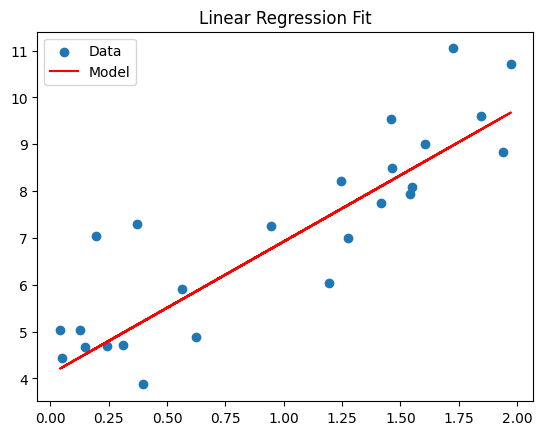

Learned coefficients (m, c): [2.82888219] 4.094074936535043


In [101]:

model = MyLinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Plot
plt.scatter(X_test, y_test, label="Data")
plt.plot(X_test, y_pred, color="red", label="Model")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()

# Print coefficients
print("Learned coefficients (m, c):", model.coefficient,model.bias)


## 📉 Plot the Loss Curve

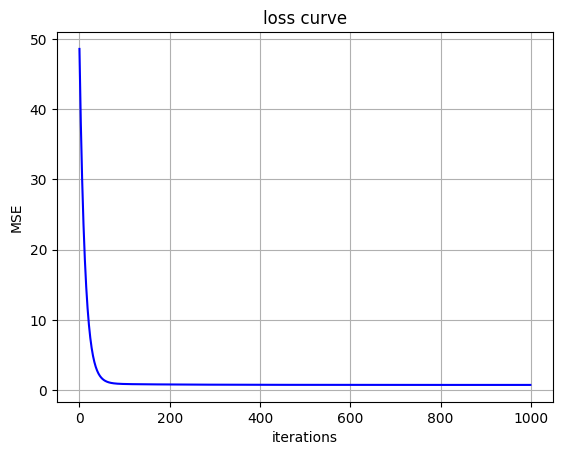

In [102]:
model.plot_loss()

## 🌟 Bonus Task: Stochastic Gradient Descent
Implement a class `MyLinearRegressionSGD` that uses one training sample per iteration to update weights.

In [103]:
import numpy as np
import matplotlib.pyplot as plt

class MyLinearRegressionSGD:
    def __init__(self, learning_rate=0.01, n_iters=100):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.coefficients = None
        self.bias = None
        self.losses = []

    def fit(self, X, y):
        y = y.flatten()
        n_samples, n_features = X.shape
        self.coefficients = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.n_iters):
            total_loss = 0

            
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(n_samples):
                xi = X_shuffled[i].reshape(1, -1)    
                yi = y_shuffled[i]                   

                
                y_pred = np.dot(xi, self.coefficients) + self.bias

                
                error = y_pred - yi
                dw = xi.T * error
                db = error

                
                self.coefficients -= self.learning_rate * dw.flatten()
                self.bias -= self.learning_rate * db

                
                total_loss += error ** 2

            avg_loss = total_loss / n_samples
            self.losses.append(avg_loss.item())  

    def predict(self, X):
        return np.dot(X, self.coefficients) + self.bias

    def plot_loss(self):
        plt.figure(figsize=(8, 5))
        plt.plot(range(len(self.losses)), self.losses, color='green', linewidth=2)
        plt.xlabel("Epochs")
        plt.ylabel("Mean Squared Error")
        plt.title("Loss Curve using Stochastic Gradient Descent")
        plt.grid(True)
        plt.show()
mod3=MyLinearRegressionSGD()
mod3.fit(X_train,y_train)
mod3.predict(X_test)

array([8.41906262, 4.47805027, 8.93045045, 4.26566564, 8.20034541,
       4.53644499, 5.23069642, 5.85587194, 6.7537226 , 9.52340879,
       4.80370526, 8.44057147, 8.59128275, 8.18704875, 4.66801845,
       5.15350787, 4.99293082, 4.23874318, 9.61975958, 7.59505462,
       8.0671353 , 7.4536208 , 9.25772551, 7.67446016, 5.68854569])

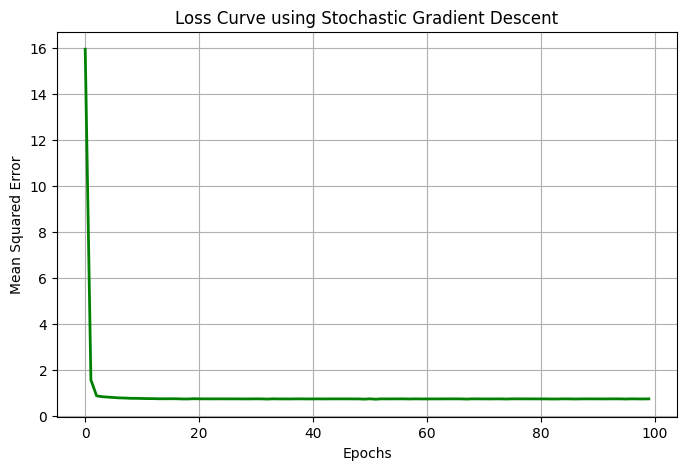

In [104]:
mod3.plot_loss()

## Visualize the prediction result of Library version and Custom regression code created

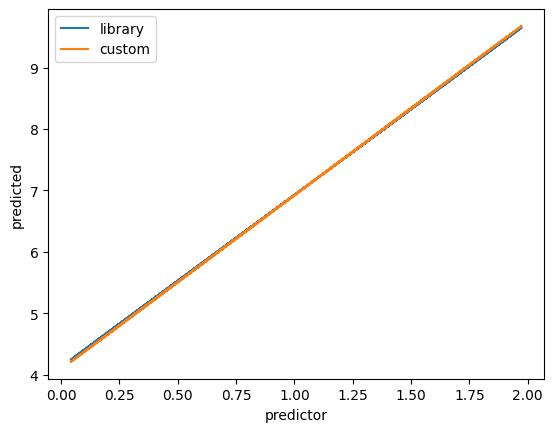

In [105]:
mod1=LinearRegression()
mod2=MyLinearRegression()

mod1.fit(X_train,y_train)
y_pred_lib=mod1.predict(X_test)
mod2.fit(X_train,y_train)
y_pred_custom=mod2.predict(X_test)

plt.plot(X_test,y_pred_lib,label='library')
plt.plot(X_test,y_pred_custom,label='custom')
plt.xlabel('predictor')
plt.ylabel('predicted')
plt.legend()
plt.show()

## ✅ Checklist
- [ ] Did linear regression using scikit-learn API
- [ ] Did Ridge and Lasso regression and compiled the result (R2 and MAPE) as a table
- [ ] Derived gradients using chain rule
- [ ] Implemented custom Linear Regression class
- [ ] Trained using gradient descent
- [ ] Visualized predictions and loss
- [ ] Implemented stochastic gradient descent (bonus)
- [ ] Visualized predictions and loss for stochastic gradient descent (bonus)
- [ ] Visualize the prediction result of Library version and custom version